In [1]:
using MyBioTools.FluTools, TreeTools, MyBioTools
using Plots
pyplot()
using Dates
using FastaIO
include("../../make_all_plots.jl")
using Statistics
using Random

┌ Info: Recompiling stale cache file /home/pierrebc/.julia/compiled/v1.1/MyBioTools.ji for MyBioTools [top-level]
└ @ Base loading.jl:1184
┌ Warning: /home/pierrebc/.julia/packages/Plots/WwFyB/src/Plots.jl/ is not an existing directory, Revise is not watching
└ @ Revise /home/pierrebc/.julia/packages/Revise/0KQ7U/src/Revise.jl:485


In [17]:
param = FluTools.get_aa_parameters()
sp, ph = FluTools.read_data("../data/aligned_h3n2_ha_aa.fasta", param);

History of all positions...


# Using lifetime as fitness

In [18]:
# All trajectories
all_traj = FluTools.all_trajectories(ph)
FluTools.get_strains!(all_traj, sp)
FluTools.get_regions!(all_traj, sp)
@time FluTools.compute_fitness!(all_traj, sp, ftype=:date)
# Rising trajectories
ascending_traj = FluTools.previous_state_condition(all_traj, :lost);

  0.378239 seconds (1.27 M allocations: 64.402 MiB, 18.37% gc time)


In [19]:
freqcond_traj_low = Dict()
freqcond_traj_high = Dict()
freqcond_traj = Dict()
alphabins = [(x,0.05) for x in 0.1:0.1:0.9]
medvals = Dict()
# alphabins = [(0.3,0.05)]
for (α, dα) in alphabins
    tmp = FluTools.frequency_condition(ascending_traj, α, dα=dα)
    fitness_values = [t.fitness[t.index[:active]] for t in tmp]
    fitness_values = fitness_values[findall(!isnan, fitness_values)]
    medfit = median(fitness_values)
    medvals[α] = medfit
    freqcond_traj_low[α] = tmp[findall(x->x.fitness[x.index[:active]] < medfit, tmp)]
    freqcond_traj_high[α] = tmp[findall(x->x.fitness[x.index[:active]] >= medfit, tmp)]
    freqcond_traj[α] = tmp
end

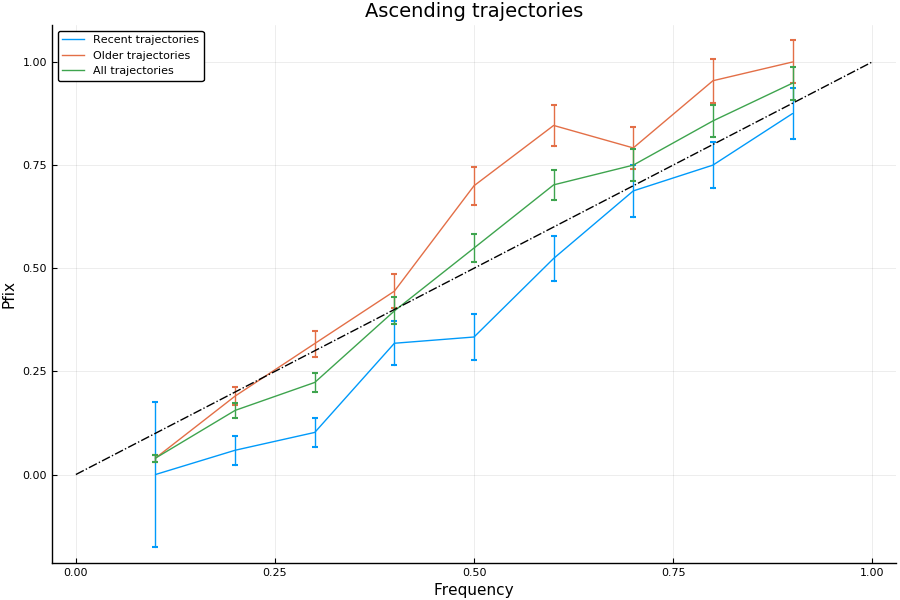

In [20]:
dat_freqcond_traj_low = Pfix_vs_frequency(freqcond_traj_low);
dat_freqcond_traj_high = Pfix_vs_frequency(freqcond_traj_high);
dat_freqcond_traj = Pfix_vs_frequency(freqcond_traj);

p = plot(xlabel="Frequency", ylabel="Pfix", title="Ascending trajectories", size=(900,600))
plot!(p, dat_freqcond_traj_low[2], dat_freqcond_traj_low[3], err = 0.25 ./sqrt.(dat_freqcond_traj_low[4]), label="Recent trajectories")
plot!(p, dat_freqcond_traj_high[2], dat_freqcond_traj_high[3], err = 0.25 ./sqrt.(dat_freqcond_traj_high[4]), label="Older trajectories")

plot!(p, dat_freqcond_traj[2], dat_freqcond_traj[3], err = 0.25 ./sqrt.(dat_freqcond_traj[4]), label="All trajectories")
plot!(p, [0,1], [0,1], line=(1, :black, :dashdot), label="")

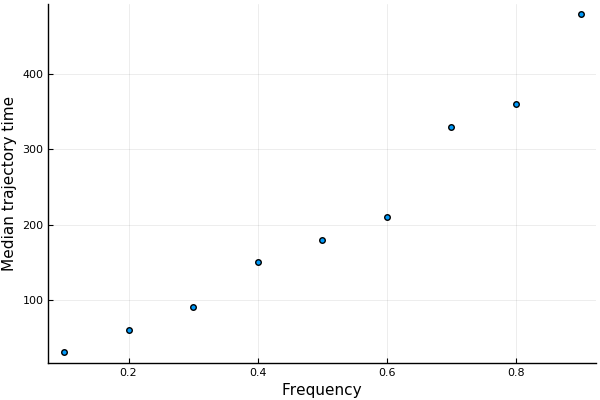

In [21]:
p = plot()
scatter!(p, Float64.(collect(keys(medvals))), Float64.(collect(values(medvals))), label="")
plot!(p, xlabel="Frequency", ylabel="Median trajectory time")

In [22]:
minfreq = 0.33; df = (1. -minfreq)/2
trajlist = FluTools.frequency_condition(ascending_traj, minfreq+df, dα = df);
out = Pfix_vs_fitness(trajlist, param, reftime=:active);

In [23]:
length(trajlist)

95

# Using regional spread as fitness

In [24]:
# All trajectories
all_traj = FluTools.all_trajectories(ph)
FluTools.get_strains!(all_traj, sp)
FluTools.get_regions!(all_traj, sp)
@time FluTools.compute_fitness!(all_traj, sp, ftype=:region)
# Rising trajectories
ascending_traj = FluTools.previous_state_condition(all_traj, :lost);

  0.928061 seconds (419.06 k allocations: 42.843 MiB, 3.79% gc time)


In [25]:
freqcond_traj_low = Dict()
freqcond_traj_high = Dict()
freqcond_traj = Dict()
alphabins = [(x,0.05) for x in 0.1:0.1:0.9]
medvals = Dict()
# alphabins = [(0.3,0.05)]
for (α, dα) in alphabins
    tmp = FluTools.frequency_condition(ascending_traj, α, dα=dα)
    fitness_values = [t.fitness[t.index[:active]] for t in tmp]
    fitness_values = fitness_values[findall(!isnan, fitness_values)]
    medfit = median(fitness_values)
    medvals[α] = medfit
    freqcond_traj_low[α] = tmp[findall(x->x.fitness[x.index[:active]] < medfit, tmp)]
    freqcond_traj_high[α] = tmp[findall(x->x.fitness[x.index[:active]] >= medfit, tmp)]
    freqcond_traj[α] = tmp
end

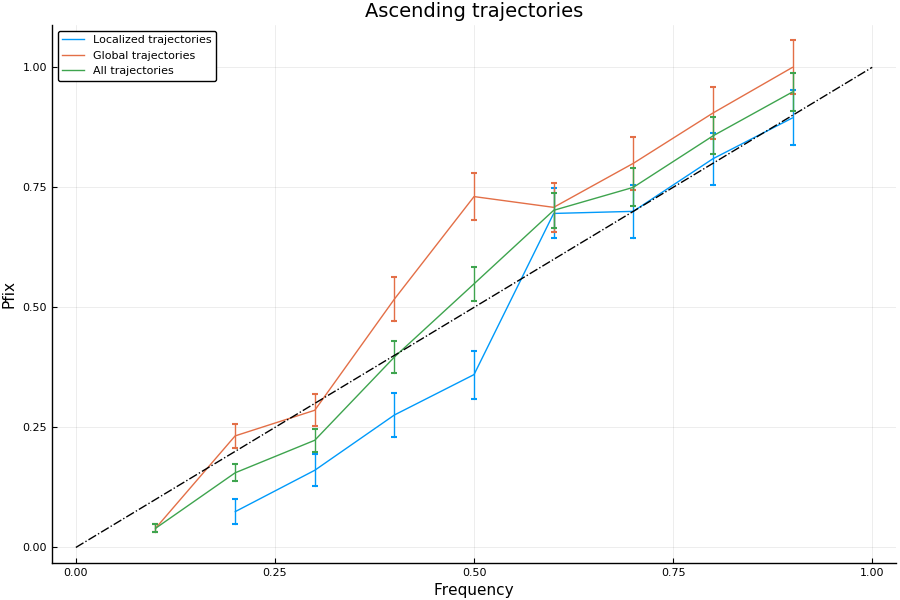

In [26]:
dat_freqcond_traj_low = Pfix_vs_frequency(freqcond_traj_low);
dat_freqcond_traj_high = Pfix_vs_frequency(freqcond_traj_high);
dat_freqcond_traj = Pfix_vs_frequency(freqcond_traj);

p = plot(xlabel="Frequency", ylabel="Pfix", title="Ascending trajectories", size=(900,600))
plot!(p, dat_freqcond_traj_low[2], dat_freqcond_traj_low[3], err = 0.25 ./sqrt.(dat_freqcond_traj_low[4]), label="Localized trajectories")
plot!(p, dat_freqcond_traj_high[2], dat_freqcond_traj_high[3], err = 0.25 ./sqrt.(dat_freqcond_traj_high[4]), label="Global trajectories")

plot!(p, dat_freqcond_traj[2], dat_freqcond_traj[3], err = 0.25 ./sqrt.(dat_freqcond_traj[4]), label="All trajectories")
plot!(p, [0,1], [0,1], line=(1, :black, :dashdot), label="")

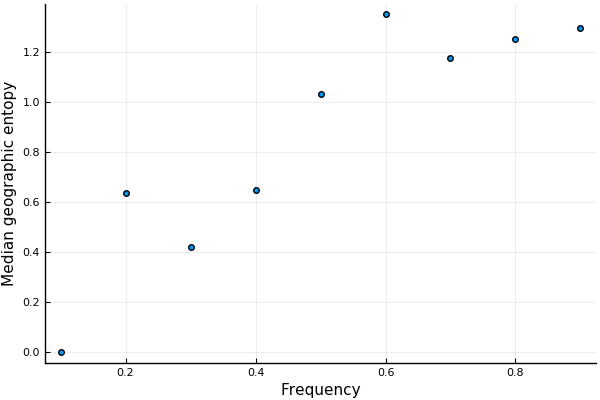

In [27]:
p = plot()
scatter!(p, Float64.(collect(keys(medvals))), Float64.(collect(values(medvals))), label="")
plot!(p, xlabel="Frequency", ylabel="Median geographic entopy")

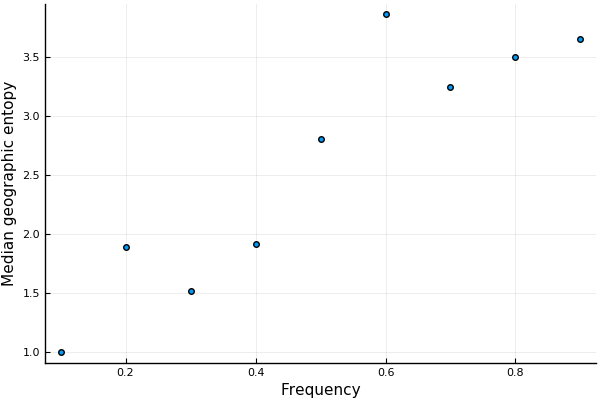

In [28]:
p = plot()
scatter!(p, Float64.(collect(keys(medvals))), exp.(Float64.(collect(values(medvals)))), label="")
plot!(p, xlabel="Frequency", ylabel="Median geographic entopy")

# Are localization and age correlated? 

In [36]:
trajectories = FluTools.frequency_condition(ascending_traj, 0.5, dα = 0.25)
trajectories = FluTools.population_size_condition(trajectories, 25, mode=:overall)
length(trajectories)

64

In [37]:
# geoloc = [FluTools.compute_region_entropy(x.regionspread[x.index[:active]]) for x in trajectories]
# age = [-x.t[x.index[:start]].value for x in trajectories]
# fix = [x.fixation==:fixed for x in trajectories];

In [38]:
function nanmean(A)        
    m = zero(first(A))
    for x in A
        if (!isnan(x) && !ismissing(x))
            m += x
        end
    end
    return m/length(A)
end

nanmean (generic function with 1 method)

In [43]:
geoloc = [nanmean(FluTools.compute_region_entropy.(x.regionspread)) for x in trajectories]
age = [x.t[end] - x.t[1] for x in trajectories]
fix = [findfirst(x->x==t.fixation, [:fixed, :lost, :poly]) for t in trajectories]

64-element Array{Int64,1}:
 2
 2
 2
 1
 2
 2
 2
 2
 1
 2
 1
 1
 2
 ⋮
 1
 1
 1
 1
 2
 2
 2
 2
 2
 2
 2
 1

In [44]:
trajectories[1].t

3-element Array{Day,1}:
 -30 days
 0 days  
 30 days 

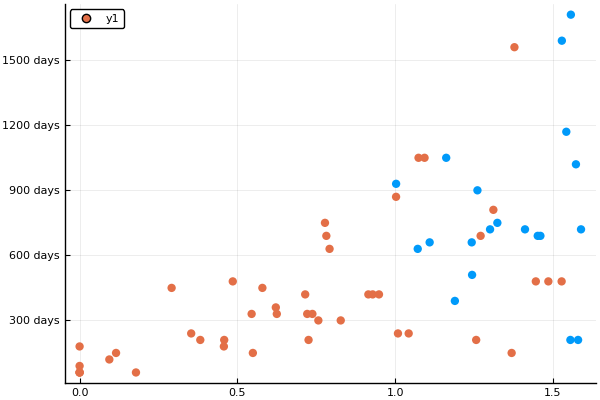

In [46]:
scatter(geoloc, age, color = fix, markerstrokewidth=0, markersize=6)

In [162]:
d = first(sp.datebin)[1]

(2004-03-16, 2004-04-15)

In [167]:
t = FluTools.datebin_to_date(d)

2004-03-31

In [173]:
FluTools.date_to_datebin(t, Day(15))

(2004-03-16, 2004-04-15)

In [128]:
intersect(findall(x->x>0.6, geoloc), findall(x->x>250, age))

1-element Array{Int64,1}:
 74

In [129]:
traj = trajectories[74]
[traj.freq traj.pop (traj.date .+ traj.t) [findmax(x)[2] for x in traj.regionspread] [FluTools.compute_region_entropy(x) for x in traj.regionspread]]

17×5 Array{Any,2}:
 0.0         132  2013-11-09  "china"           NaN       
 0.0578512   242  2013-12-09  "southeast_asia"    0.244898
 0.0625      480  2014-01-08  "southeast_asia"    0.704444
 0.0880361   443  2014-02-07  "japan_korea"       0.719264
 0.0967742   310  2014-03-09  "japan_korea"       0.706667
 0.168224    321  2014-04-08  "north_america"     0.750445
 0.172222    180  2014-05-08  "north_america"     0.801249
 0.248908    229  2014-06-07  "southeast_asia"    0.776854
 0.191589    214  2014-07-07  "southeast_asia"    0.76859 
 0.344828    145  2014-08-06  "china"             0.6688  
 0.337349    166  2014-09-05  "china"             0.766582
 0.225191    262  2014-10-05  "china"             0.796897
 0.143216    398  2014-11-04  "china"             0.77747 
 0.0981755  1151  2014-12-04  "west_asia"         0.820738
 0.0519637  1655  2015-01-03  "west_asia"         0.791239
 0.053012   1245  2015-02-02  "west_asia"         0.701561
 0.0407407   540  2015-03-04  "west_a

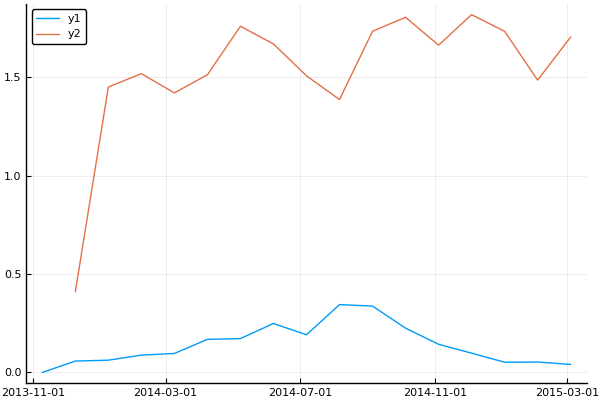

In [139]:
plot(traj.date .+ traj.t, traj.freq)
plot!(traj.date .+ traj.t, FluTools.compute_region_entropy.(traj.regionspread, scoretype=:entropy))

In [137]:
traj.regionspread[10]

Dict{String,Int64} with 10 entries:
  "china"          => 24
  "south_america"  => 0
  "southeast_asia" => 15
  "japan_korea"    => 1
  "south_asia"     => 3
  "europe"         => 2
  "north_america"  => 3
  "africa"         => 0
  "west_asia"      => 0
  "oceania"        => 2

In [138]:
FluTools.compute_region_entropy(traj.regionspread[10])

0.6688000000000001

In [99]:
# traj = trajectories[137]
traj_ocna = traj
[traj.freq traj.pop (traj.date .+ traj.t) [findmax(x)[2] for x in traj.regionspread]]

25×4 Array{Any,2}:
 0.0        1  2001-06-15  "china"        
 0.111111  18  2001-07-15  "oceania"      
 0.5625    16  2001-08-14  "oceania"      
 0.833333   6  2001-09-13  "oceania"      
 1.0        3  2001-10-13  "oceania"      
 0.75       4  2001-11-12  "north_america"
 0.777778   9  2001-12-12  "north_america"
 0.928571  42  2002-01-11  "north_america"
 1.0       35  2002-02-10  "north_america"
 0.944444  18  2002-03-12  "north_america"
 0.833333  12  2002-04-11  "oceania"      
 0.833333  18  2002-05-11  "oceania"      
 0.869565  23  2002-06-10  "oceania"      
 0.853659  41  2002-07-10  "oceania"      
 0.916667  24  2002-08-09  "oceania"      
 1.0        6  2002-09-08  "oceania"      
 0.5        4  2002-10-08  "oceania"      
 0.0        5  2002-11-07  "china"        
 0.2        5  2002-12-07  "europe"       
 0.0        8  2003-01-06  "china"        
 0.294118  17  2003-02-05  "north_america"
 0.142857  14  2003-03-07  "europe"       
 0.5        2  2003-04-06  "north_a

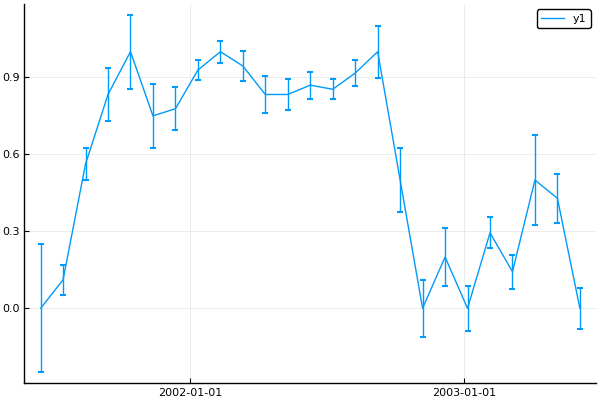

In [52]:
plot(traj.date .+ traj.t, traj.freq, err = 0.25 ./sqrt.(traj.pop))

In [61]:
traj.regionspread[11]

Dict{String,Int64} with 10 entries:
  "china"          => 2
  "south_america"  => 0
  "southeast_asia" => 0
  "japan_korea"    => 0
  "south_asia"     => 0
  "europe"         => 1
  "north_america"  => 0
  "africa"         => 0
  "west_asia"      => 0
  "oceania"        => 7

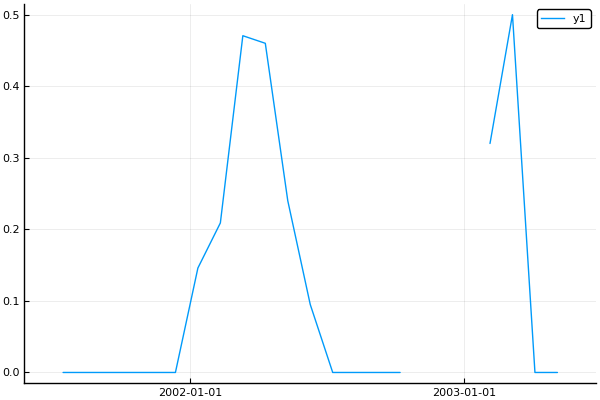

In [77]:
plot(traj.date .+ traj.t, FluTools.compute_region_entropy.(traj.regionspread))

In [83]:
FluTools.compute_region_entropy.(traj.regionspread)

25-element Array{Float64,1}:
 NaN                  
   0.0                
   0.0                
   0.0                
   0.0                
   0.0                
   0.0                
   0.1459566074950689 
   0.20897959183673465
   0.47058823529411753
   0.4600000000000001 
   0.24               
   0.09500000000000008
   0.0                
   0.0                
   0.0                
   0.0                
 NaN                  
   0.0                
 NaN                  
   0.31999999999999984
   0.5                
   0.0                
   0.0                
 NaN                  

# Entropy or squared sums

In [68]:
f(k ; N=100) = vcat([(N-k)/N], [1/N for i in 1:k])
sqrsums(x) = 1 - sum(x.^2)

sqrsums (generic function with 1 method)

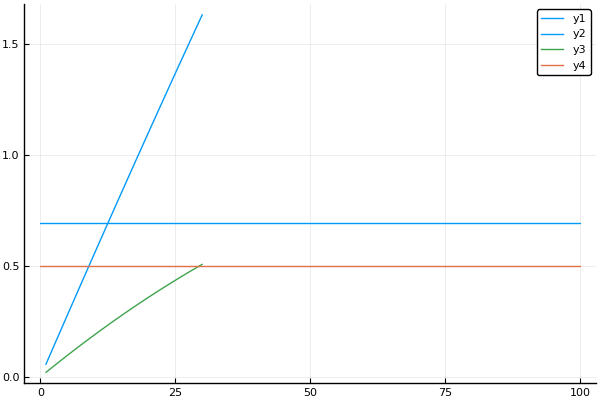

In [91]:
k = collect(1:30)
plot(k, StatsBase.entropy.(f.(k)))
plot!([0,100], [log(2),log(2)], color=1)
plot!(k, sqrsums.(f.(k)))
plot!([0,100], [1/2,1/2], color=2)

In [72]:
exp(4.5)

90.01713130052181